In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ft2font
from matplotlib.cm import get_cmap
from matplotlib.colors import LinearSegmentedColormap
import itertools
from itertools import zip_longest
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse import dok_matrix
from scipy.sparse import block_diag
from scipy.sparse.linalg import eigsh
import scipy.linalg as la
import os
import Hamiltonian_definition as HD

In [2]:
# save_path = "/home/costanza/UNIVERSITÀ/secondo semestre/MOLTI CORPI/dati/"
save_path = r"C:/Users/Costa/UNIVERSITÀ/secondo semestre/MOLTI CORPI/dati/"


# SHASTRY SUTHERLAND MODEL
### H = $J1\sum_{<i,j>} S_i S_j + J2\sum_{<<i,j>>} S_i S_j$ with J1,J2>0



## Lattice definition

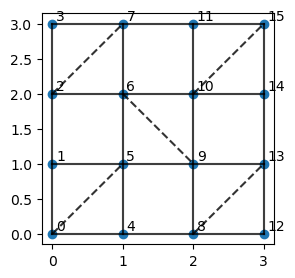

0 --> Nearest neighbors: [4, 3]  -- Next neighbor: [5]
1 --> Nearest neighbors: [5, 0]  -- Next neighbor: [14]
2 --> Nearest neighbors: [6, 1]  -- Next neighbor: [7]
3 --> Nearest neighbors: [7, 2]  -- Next neighbor: [12]
4 --> Nearest neighbors: [8, 7]  -- Next neighbor: [11]
5 --> Nearest neighbors: [9, 4]  -- Next neighbor: [0]
6 --> Nearest neighbors: [10, 5]  -- Next neighbor: [9]
7 --> Nearest neighbors: [11, 6]  -- Next neighbor: [2]
8 --> Nearest neighbors: [12, 11]  -- Next neighbor: [13]
9 --> Nearest neighbors: [13, 8]  -- Next neighbor: [6]
10 --> Nearest neighbors: [14, 9]  -- Next neighbor: [15]
11 --> Nearest neighbors: [15, 10]  -- Next neighbor: [4]
12 --> Nearest neighbors: [0, 15]  -- Next neighbor: [3]
13 --> Nearest neighbors: [1, 12]  -- Next neighbor: [8]
14 --> Nearest neighbors: [2, 13]  -- Next neighbor: [1]
15 --> Nearest neighbors: [3, 14]  -- Next neighbor: [10]


In [3]:
Lx, Ly = 4,4 # lattice dim
L=Lx*Ly
dim=2**(Lx*Ly)

coor = HD.generate_lattice(Lx,Ly)
neighbors_indices = HD.index_nn(coor,Lx,Ly)
diag_indices = HD.index_nnn(coor,Lx,Ly)

HD.plot_lattice(coor,neighbors_indices,diag_indices)

### Representation of the dimer state

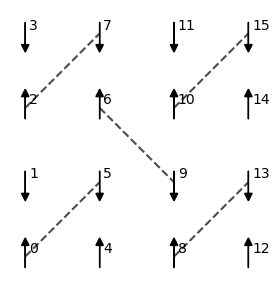

In [4]:
spins = [+1, -1, +1, -1, +1, -1, +1, -1, +1, -1, +1, -1, +1, -1, +1, -1]
HD.plot_dimer(coor,neighbors_indices,diag_indices,spins)

# Diagonalization
### Diagonalization of the hamiltonian changing J1 and J2
In the following cells, I either created an array theta that defines different angle values (that I used in the "for loop" to vary J1 and J2) or I manually changed their values.

$J1=sin(\theta)$ and $J2=cos(\theta)$

In [5]:
# angles = [(2*i-1)*np.pi/16 for i in range(6)]
# theta = angles[1:-1]
# print(theta)

In [ ]:
%%time
J1 = [0.01]
J2 = [1.0]
#for i in range(len(theta)):
for i in range(len(J1)):
    print("-------------------------------")
    # print(i, f"theta={theta[i]}")
    # J1=np.sin(theta[i])
    # J2=np.cos(theta[i])
    print(i)
    J1=J1[i]
    J2=J2[i]

    folder_name = f"J1={round(J1,2)}_J2={round(J2,2)}/"
    full_path = save_path + folder_name


    HN = []
    for N in range(Lx*Ly+1):
        print(f'N={N}')
        HN.append(HD.build_HN(Lx,Ly,N,J1,J2,neighbors_indices,diag_indices))
        print(HN[N].shape)

        HN_dict = {}
        HN_dict[f'HN_{N}'] = HN[N].toarray()

        eigvals, eigvecs = la.eigh(HN_dict[f'HN_{N}'])
        print(f"finito di diagonalizzare HN_{N} alle", datetime.now())
        print("")
        
        folder_eig = f"eigvals block N={N}/"    # SAVING DATA
        path = full_path + folder_eig
        os.makedirs(path, exist_ok=True)
        np.save(path+f"eigvals_N={N}", eigvals)
        np.save(path+f"eigvecs_N={N}", eigvecs)

-------------------------------
0
N=0
(1, 1)
finito di diagonalizzare HN_0 alle 2025-07-14 11:03:42.869546

N=1
(16, 16)
finito di diagonalizzare HN_1 alle 2025-07-14 11:03:42.898890

N=2
(120, 120)
finito di diagonalizzare HN_2 alle 2025-07-14 11:03:42.959490

N=3
(560, 560)
finito di diagonalizzare HN_3 alle 2025-07-14 11:03:43.314477

N=4
(1820, 1820)
finito di diagonalizzare HN_4 alle 2025-07-14 11:03:45.824056

N=5
(4368, 4368)
finito di diagonalizzare HN_5 alle 2025-07-14 11:04:08.444485

N=6
(8008, 8008)


# Reading data

### J1=0, J2=1 DIMER PHASE (only diagonal bonds)
 Plotting of eigen values for each N block

C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\1306578299.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


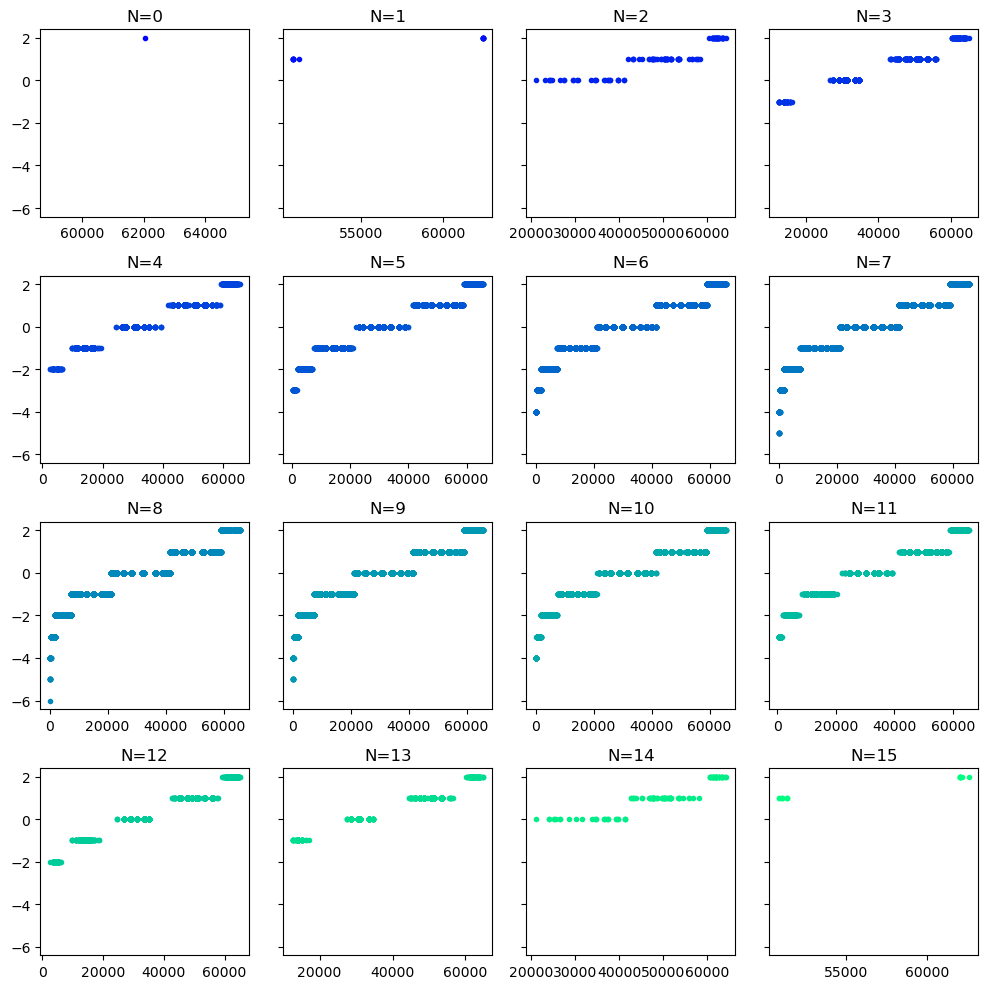

In [ ]:
all_eigvals = []
all_labels = []
for i in range(16):
    a=np.load(save_path+"J1=0.0_J2=1.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

fig, axes = plt.subplots(4,4, figsize=(10, 10), sharey=True)
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 16))

for i, ax in enumerate(axes.flatten()):
    mask = all_labels_sorted == i
    ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i])
    ax.set_title(f"N={i}")

plt.tight_layout()
plt.show()

#### All eigen values

C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\3280978401.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


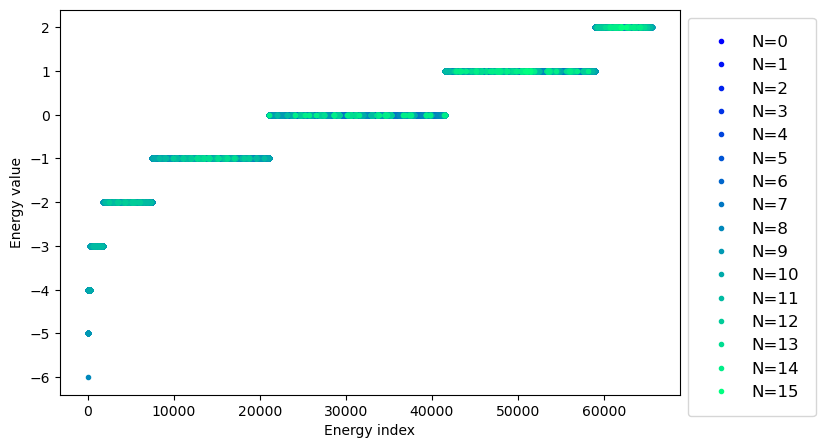

In [ ]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 16))

for i in range(16):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1, fontsize=12)
plt.ylabel("Energy value")
plt.xlabel("Energy index")
# plt.savefig(save_path+"dimer phase enrgies")
plt.show()

eigvals_0_1 = all_eigvals_sorted
labels_0_1 = all_labels_sorted

#### Check the degeneracy of the first excited state
 GS == all singlet in the eight dimers

 First excited states: one singlet --> triplet $\Rightarrow$ deg=8*3 (I can break one singlet into a triplet in each of the 8 dimers, and the triplet can be $|\uparrow \uparrow>$, $|\downarrow \downarrow>$ or $|\uparrow \downarrow> + |\downarrow \uparrow>$)

3


C:\Users\Costa\AppData\Local\Temp\ipykernel_6556\2482618454.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


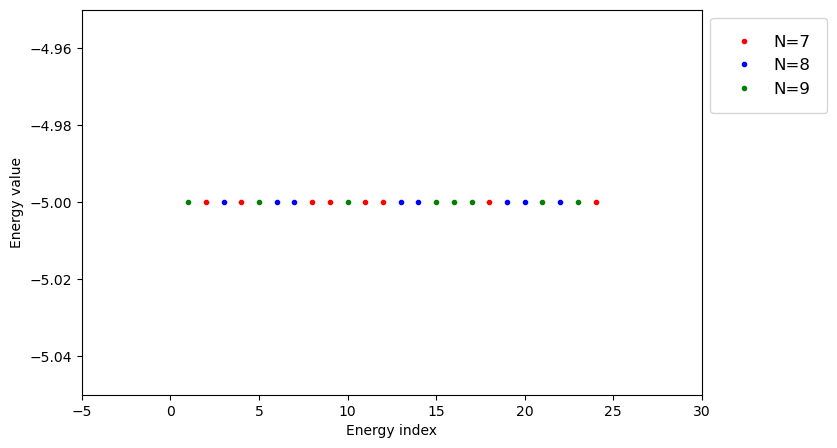

In [ ]:
plt.figure(figsize=(8,5))
colors = ["red","blue","green"]
j=0
for i in range(16):
    mask = all_labels_sorted == i
    if i==7 or i==8 or i==9:
        plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[j], label=f"N={i}")
        j+=1
    else:
        continue
print(j)
plt.xlim(-5,30)
plt.ylim(-5.05,-4.95)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1, fontsize=12)
plt.ylabel("Energy value")
plt.xlabel("Energy index")
# plt.savefig(save_path+"dimer phase enrgies")
plt.show()

eigvals_0_1 = all_eigvals_sorted
labels_0_1 = all_labels_sorted

In [ ]:
# ground state 
E0_0 = all_eigvals_sorted[0]
index_e0_0 = 0
index = all_labels_sorted[0]
print(E0_0, index_e0_0, index)

# first excited state
E1_0 = all_eigvals_sorted[1]
index_e1_0 = 1
index = all_labels_sorted[1]
print(E1_0, index_e1_0, index)

-5.9999999999999885 0 8
-5.0000000000000115 1 9


### J1=1, J2=0 HEISENBERG 2D 
All eigenvalues

C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\135044028.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


E0=-11.228483208428814


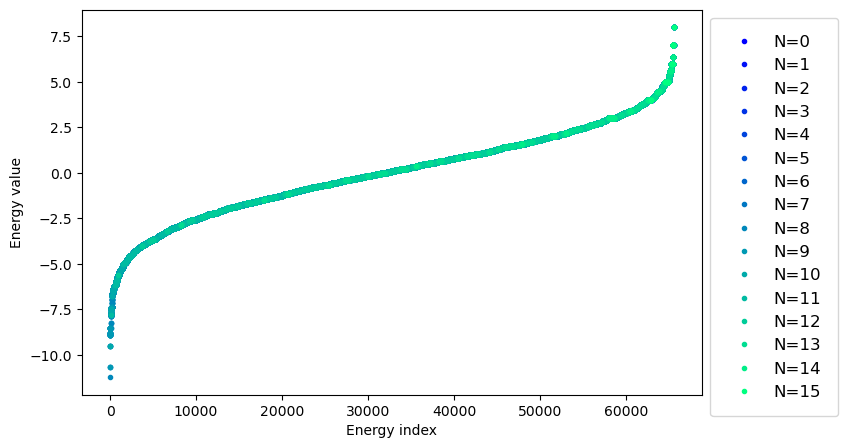

In [13]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 16))

all_eigvals = []
all_labels = []
for i in range(16):
    a=np.load(save_path+"J1=1.0_J2=0.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

print(f"E0={all_eigvals_sorted[0]}")

for i in range(16):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1, fontsize=12)
plt.ylabel("Energy value")
plt.xlabel("Energy index")
plt.show()

eigvals_1_0 = all_eigvals_sorted
labels_1_0 = all_labels_sorted



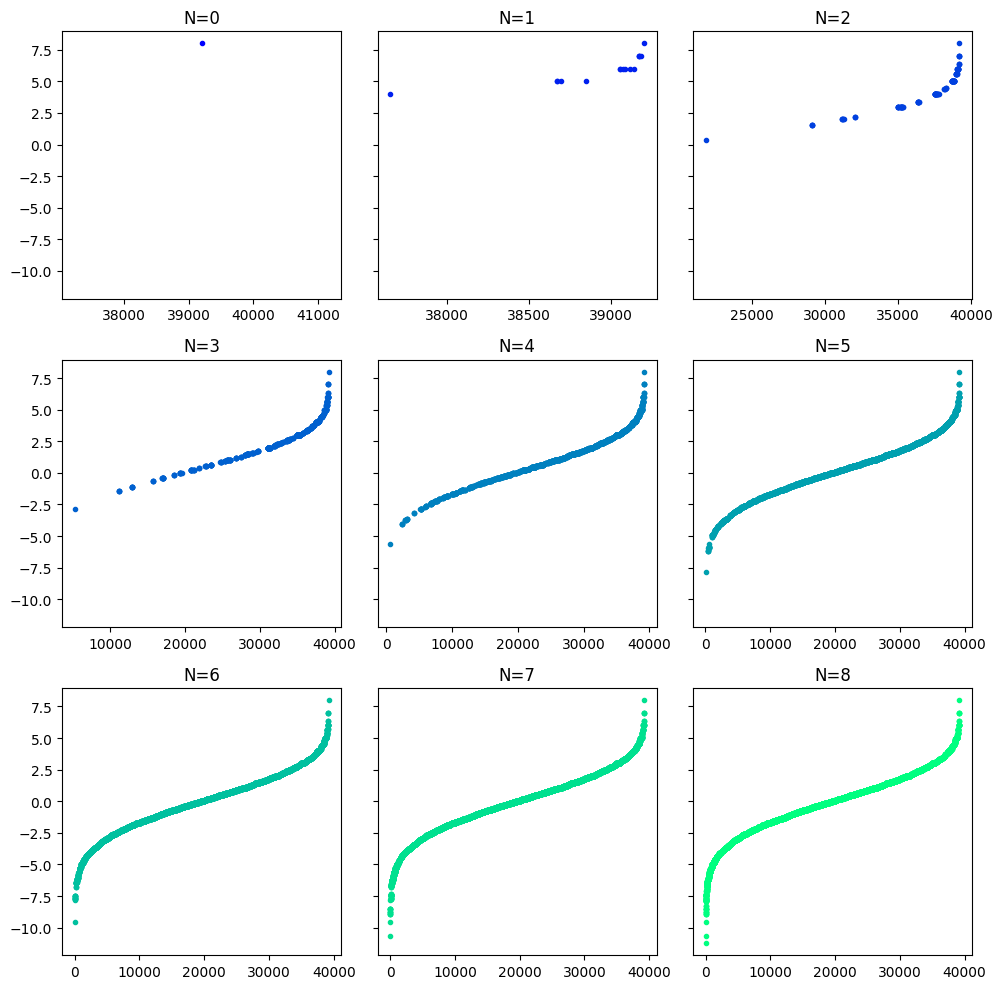

In [7]:
fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    mask = all_labels_sorted == i
    ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i])
    ax.set_title(f"N={i}")
plt.tight_layout()
plt.show()

### All values of J1 and J2: plotting of all spectra

C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\2904922861.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")
C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\2904922861.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


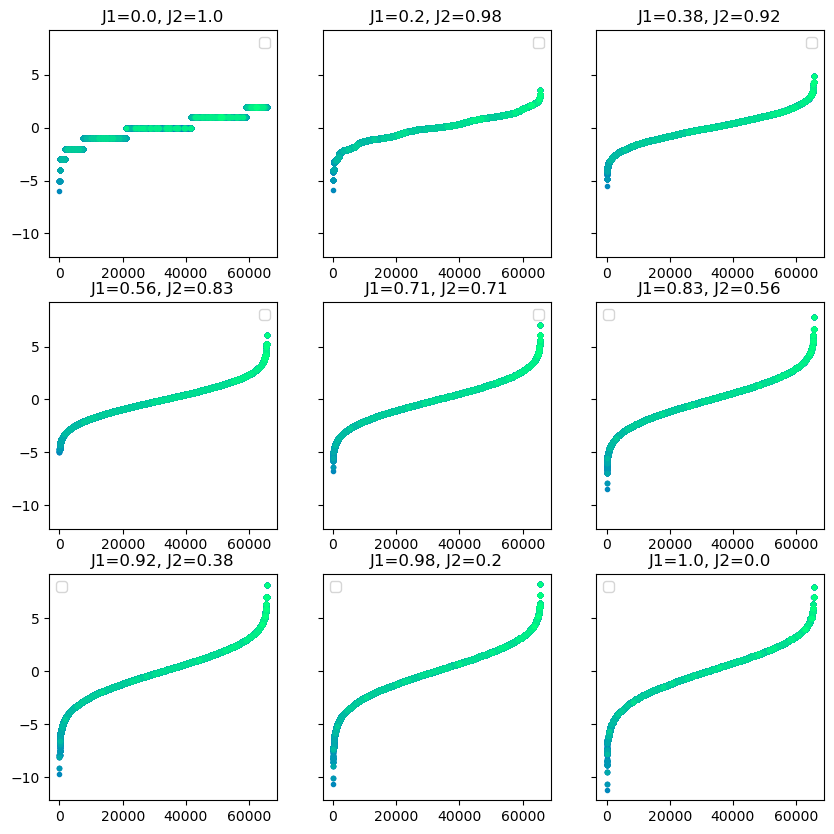

In [16]:
folder = ["J1=0.0_J2=1.0/", "J1=0.2_J2=0.98/","J1=0.38_J2=0.92/",
          "J1=0.56_J2=0.83/", "J1=0.71_J2=0.71/", "J1=0.83_J2=0.56/", 
          "J1=0.92_J2=0.38/", "J1=0.98_J2=0.2/", "J1=1.0_J2=0.0/"]
all_theta = [i*np.pi/16 for i in range(9)]

eigvals_dict = {}
labels_dict = {}

fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)
for F, ax in enumerate(axes.flatten()):
    colormap = get_cmap("winter")
    colors = colormap(np.linspace(0, 1, 16))

    all_eigvals = []
    all_labels = []
    for i in range(16):
        eigvals = np.load(save_path+folder[F]+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
        # if i==8 or i==7:
        #     print(f"{folder[F]}, N={i}, energia minima di questo sottospazio = {np.min(eigvals)}")
        all_eigvals.extend(eigvals)
        all_labels.extend([i]*len(eigvals)) 

    all_eigvals = np.array(all_eigvals)
    all_labels = np.array(all_labels)

    sorted_indices = np.argsort(all_eigvals)
    all_eigvals_sorted = all_eigvals[sorted_indices]
    all_labels_sorted = all_labels[sorted_indices]

    for i in range(16):
        mask = all_labels_sorted == i
        ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i])#, label=f"N={i}")
    J1 = np.sin(all_theta[F])
    J2 = np.cos(all_theta[F])
    ax.set_title(f'J1={round(J1,2)}, J2={round(J2,2)}')
    ax.legend()

    eigvals_dict[f'all_theta_{F}'] = all_eigvals_sorted
    labels_dict[f'all_theta_{F}'] = all_labels_sorted

plt.show()

J1=1.0_J2=0.0/


C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\1467586377.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


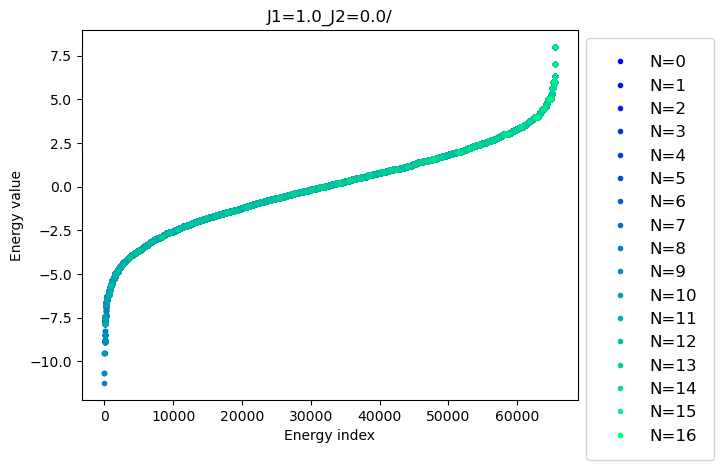

In [21]:
#plotting of single spectrum
F=8 # choose the folder
print(folder[F])
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 17))

for i in range(17):
    mask = labels_dict[f'all_theta_{F}'] == i
    plt.plot(np.where(mask)[0],eigvals_dict[f'all_theta_{F}'][mask], '.', color=colors[i], label=f"N={i}")

plt.title(f"{folder[F]}")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1, fontsize=12)
plt.ylabel("Energy value")
plt.xlabel("Energy index")
# plt.savefig(save_path+"dimer phase enrgies")
plt.show()

J1=1.0_J2=0.0/


C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\1407729787.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


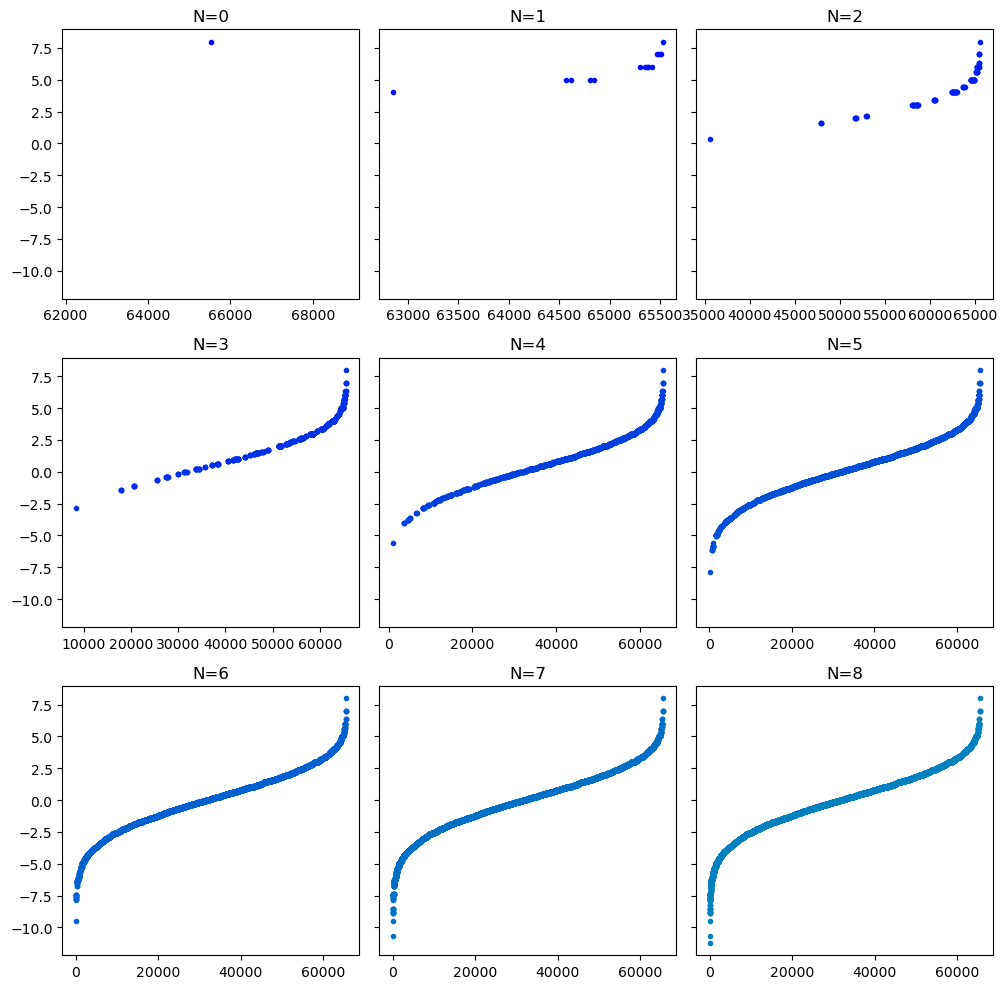

In [22]:
# plotting of N block spectra for a pair J1-J2
fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)
F=8
print(folder[F])
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 17))
for i, ax in enumerate(axes.flatten()):
    mask = labels_dict[f'all_theta_{F}'] == i
    ax.plot(np.where(mask)[0], eigvals_dict[f'all_theta_{F}'][mask], '.', color=colors[i])
    ax.set_title(f"N={i}")
plt.tight_layout()
plt.show()

### J1=1, J2=0.01: HEISENBERG 2D WITH A PERTURBATION
All eigen values

/tmp/ipykernel_21767/695694716.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


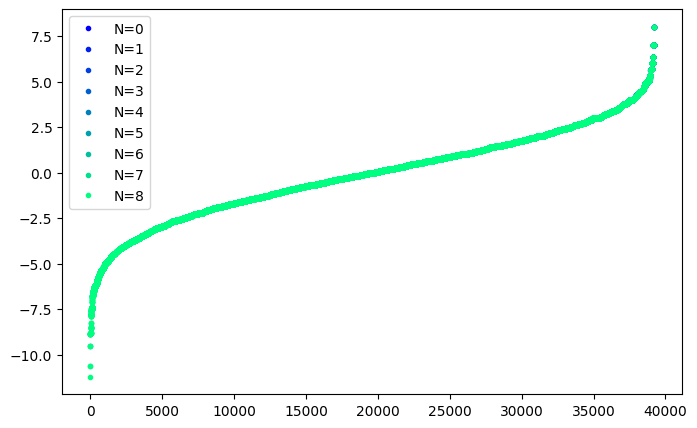

-11.211389276164043


In [9]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=1.0_J2=0.01/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend()
plt.show()
print(all_eigvals_sorted[0])

eigvals_1_0 = all_eigvals_sorted
labels_1_0 = all_labels_sorted

### J1=0.01_J2=1.0. DIMER PHASE WITH A PERTURBATION

C:\Users\Costa\AppData\Local\Temp\ipykernel_11104\2100955898.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


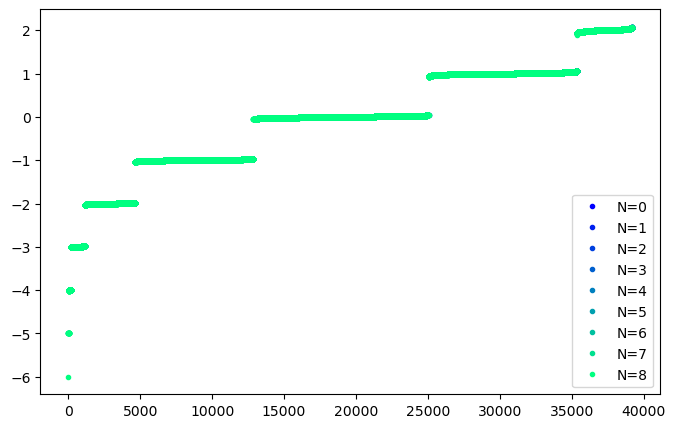

-6.000000000000006


In [ ]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=0.01_J2=1.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend()
plt.show()
print(all_eigvals_sorted[0])

E0_0 = all_eigvals_sorted[0]
index_e0_0 = 0
index = all_labels_sorted[0]
print(E0_0, index_e0_0, index)

E1_0 = all_eigvals_sorted[1]
index_e1_0 = 1
index = all_labels_sorted[0]
print(E1_0, index_e1_0, index)


# Analysis

### Plotting energies changing J1, J2

In [1]:
all_theta = [i*np.pi/16 for i in range(9)]
all_theta = np.array(all_theta)
number = 26 #how many eigen values do you want?
J1 = np.sin(all_theta)
J2 = np.cos(all_theta)
plt.figure(figsize=(8,5))
colormap = get_cmap("rainbow")
colors = colormap(np.linspace(0, 1, number))
for j in range(number):
    energy = [eigvals_dict[f'all_theta_{i}'][j] for i in range(len(all_theta))]
    plt.plot(all_theta, energy, label=f'E{j}',color=colors[j])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1, fontsize=8)

plt.xlabel(r'$\theta$ [rad]')# -- (J1=sin($\theta$))')
plt.ylabel('eigvals')
plt.title(f"First {number} eigenvalues")
#plt.xlim(0.4,0.8)
#plt.ylim(-6,-4)

NameError: name 'np' is not defined

### gap changing J1, J2
theoretical function for the gap is good only for small value of the ratio J1/J2

C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\3801458354.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


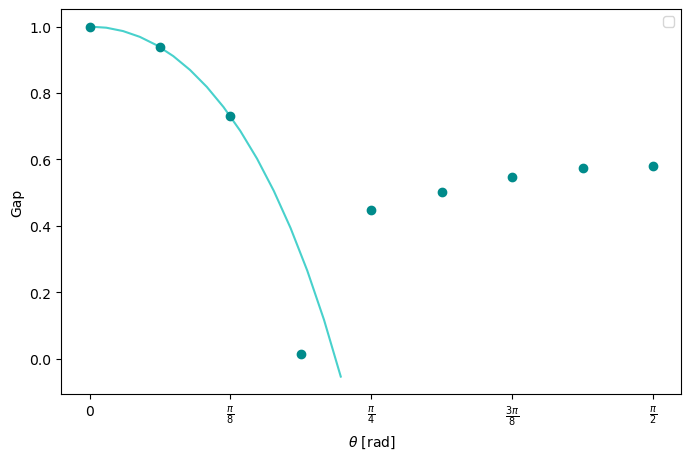

In [ ]:
GS = [eigvals_dict[f'all_theta_{i}'][0] for i in range(len(all_theta))]
E1 = [eigvals_dict[f'all_theta_{i}'][1] for i in range(len(all_theta))]
J1 = np.sin(all_theta)
J2 = np.cos(all_theta)

# for i in range(len(all_theta)):
#     print(round(all_theta[i],2), f'J1={round(J1[i],2)}, J2={round(J2[i],2)}, J1/J2={round(J1[i]/J2[i],5)}')

theta = [i * 0.7 / 15 for i in range(16)]
gap = np.cos(theta)*(1-(np.tan(theta))**2-0.5*(np.tan(theta))**3-0.125*(np.tan(theta))**4) #theoretic gap

plt.figure(figsize=(8,5))
plt.plot(theta, gap, color="mediumturquoise",label="theoretical function")
plt.plot(all_theta, np.array(E1)-np.array(GS), "o", color="darkcyan",label="from simulation")
plt.title("Gap")

plt.xlabel(r'$\theta$ [rad]')#-- (J1=sin($\theta$))')
plt.ylabel('Gap')
xticks = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
xtick_labels = [r"$0$", r"$\frac{\pi}{8}$", r"$\frac{\pi}{4}$", r"$\frac{3\pi}{8}$", r"$\frac{\pi}{2}$"]
plt.xticks(xticks, xtick_labels)
plt.legend()
plt.show()

### dimer state energy (from ground state to extice state)

Dimer state is an eigen state for all values of J1 and J2, in the "dimer phase" is also the ground state. So we can use it to estimate the value of J1 and J2 at the transition point. 

In [25]:
folder = ["J1=0.0_J2=1.0/", "J1=0.2_J2=0.98/","J1=0.38_J2=0.92/",
          "J1=0.56_J2=0.83/", "J1=0.71_J2=0.71/", "J1=0.83_J2=0.56/", 
          "J1=0.92_J2=0.38/", "J1=0.98_J2=0.2/", "J1=1.0_J2=0.0/"]

# dimer phase - ground state
F = 0 # == J1=0, J2=1
N = 8 # == subspace that contains the GS
# print(folder[F])
eigvals = np.load(save_path+folder[F]+f"eigvals block N={N}/"+f"eigvals_N={N}.npy") 
eigvecs = np.load(save_path+folder[F]+f"eigvals block N={N}/"+f"eigvecs_N={N}.npy")
# print(eigvecs.shape)

min_index = np.argmin(eigvals)
dimer_state = eigvecs[:, min_index] # find the eigvec or the GS given its energy



In [26]:
energies = []
found_indices = []

dimer_state = dimer_state / np.linalg.norm(dimer_state) # normalization just in case

for i, folder_name in enumerate(folder):
    eigvals_i = np.load(save_path + folder_name + f"eigvals block N={N}/eigvals_N={N}.npy")
    eigvecs_i = np.load(save_path + folder_name + f"eigvals block N={N}/eigvecs_N={N}.npy")

    eigvecs_i = eigvecs_i / np.linalg.norm(eigvecs_i, axis=0)

    # Cfr with dimer_state 
    found = False
    for j in range(eigvecs_i.shape[1]):
        if np.allclose(eigvecs_i[:, j], dimer_state, atol=1e-6) or np.allclose(eigvecs_i[:, j], -dimer_state, atol=1e-6):
            energies.append(eigvals_i[j])
            found_indices.append(j)
            found = True
            break
    if not found:
        energies.append(None)
        found_indices.append(None)
        print(f"State not found in: {folder_name}")

for i in range(len(folder)):
    print(f"{folder[i]} → index = {found_indices[i]}, energy = {energies[i]}")


State not found in: J1=1.0_J2=0.0/
J1=0.0_J2=1.0/ → index = 0, energy = -5.9999999999999885
J1=0.2_J2=0.98/ → index = 0, energy = -5.8847116824193835
J1=0.38_J2=0.92/ → index = 0, energy = -5.543277195067721
J1=0.56_J2=0.83/ → index = 1, energy = -4.988817673815271
J1=0.71_J2=0.71/ → index = 280, energy = -4.242640687119285
J1=0.83_J2=0.56/ → index = 1227, energy = -3.333421398117613
J1=0.92_J2=0.38/ → index = 2882, energy = -2.29610059419054
J1=0.98_J2=0.2/ → index = 5027, energy = -1.1705419320967705
J1=1.0_J2=0.0/ → index = None, energy = None


C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\2791815804.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("rainbow")


Text(0, 0.5, 'eigvals')

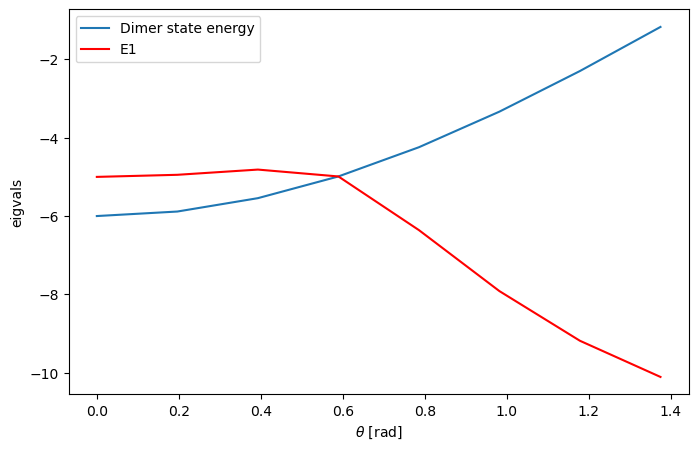

In [27]:
all_theta = [i*np.pi/16 for i in range(9)]
all_theta = np.array(all_theta)
J1 = np.sin(all_theta)
J2 = np.cos(all_theta)

number = 2 #how many eigen values do you want?

plt.figure(figsize=(8,5))
colormap = get_cmap("rainbow")
colors = colormap(np.linspace(0, 1, number))

plt.plot(all_theta[:-1], energies[:-1], label="Dimer state energy")

for j in range(1,number):
    energy = [eigvals_dict[f'all_theta_{i}'][j] for i in range(len(all_theta))]
    plt.plot(all_theta[:-1], energy[:-1], label=f'E{j}',color=colors[j])
    plt.legend()
plt.xlabel(r'$\theta$ [rad]')# -- (J1=sin($\theta$))')
plt.ylabel('eigvals')
#plt.xlim(0.4,0.8)
#plt.ylim(-6,-4)

### Correlation

In [28]:
folder = ["J1=0.0_J2=1.0/", "J1=0.2_J2=0.98/","J1=0.38_J2=0.92/",
          "J1=0.56_J2=0.83/", "J1=0.71_J2=0.71/", "J1=0.83_J2=0.56/", 
          "J1=0.92_J2=0.38/", "J1=0.98_J2=0.2/", "J1=1.0_J2=0.0/", "J1=1.0_J2=0.01/", "J1=0.01_J2=1.0/"]

all_theta = [i*np.pi/16 for i in range(9)]

In [29]:
# loading of the eigen vectors
F = -3 #which folder? ie which values of J1 and J2
N = 8 #which block? ie number of spin up
print(folder[F])
eigvecs = np.load(save_path+folder[F]+f"eigvals block N={N}/"+f"eigvecs_N={N}.npy")
print(eigvecs.shape)

J1=1.0_J2=0.0/
(12870, 12870)


In [ ]:
# mean value of the correlation
psi1 = eigvecs[:,0]
psi2 = eigvecs[:,0]

SiSj_nn_exval, SiSj_nnn_exval = HD.spin_corr(Lx,Ly,psi1,psi2,N,neighbors_indices,diag_indices)

print("nearest neighbor correlation", SiSj_nn_exval)
print("next neighbor correlation", SiSj_nnn_exval)

nearest neighbor correlation -0.35089010026339984
next neighbor correlation 0.2137652853994247


In [ ]:
# correlation site i - site j
GS = eigvecs[:, 0]
L = Lx * Ly
correlations = HD.compute_sisj_correlations(GS, N, L)
for i in range(4):
    for j in range(4):
        print(f'i={i}, j={j}, corr={correlations[i,j]}')

SzSz_nn_exval, SzSz_nnn_exval = HD.sisj_mean(GS,N,L,neighbors_indices,diag_indices)
print("nearest neighbor correlation", SzSz_nn_exval)
print("next neighbor correlation", SzSz_nnn_exval)

J1=1.0_J2=0.0/
i=0, j=0, corr=0.7500000000000124
i=0, j=1, corr=-0.3508901002634006
i=0, j=2, corr=0.21376528539942377
i=0, j=3, corr=-0.3508901002634002
i=1, j=0, corr=-0.3508901002634006
i=1, j=1, corr=0.7500000000000124
i=1, j=2, corr=-0.3508901002634012
i=1, j=3, corr=0.2137652853994239
i=2, j=0, corr=0.21376528539942377
i=2, j=1, corr=-0.3508901002634012
i=2, j=2, corr=0.7500000000000124
i=2, j=3, corr=-0.3508901002634003
i=3, j=0, corr=-0.3508901002634002
i=3, j=1, corr=0.2137652853994239
i=3, j=2, corr=-0.3508901002634003
i=3, j=3, corr=0.7500000000000124
nearest neighbor correlation -0.35089010026340034
next neighbor correlation 0.2137652853994237


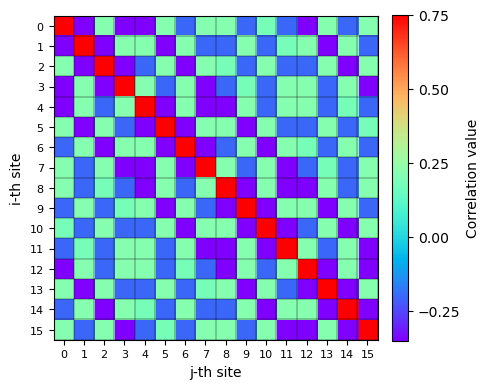

In [23]:
# Plot tipo heatmap
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(correlations, cmap='rainbow')#, vmin=-0.75, vmax=0.75)

cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, ticks=np.linspace(-0.75, 0.75, 7))
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Correlation value', fontsize=10)

ax.set_xlabel('j-th site')
ax.set_ylabel('i-th site')
ticks = list(range(16))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.tick_params(axis='both', labelsize=8)

ax.set_xticks(np.arange(-.5, 16, 1), minor=True) 
ax.set_yticks(np.arange(-.5, 16, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.3)
ax.tick_params(which='minor', bottom=False, left=False)


plt.tight_layout()
plt.show()

Now I fix one site and look at its correlations with the others

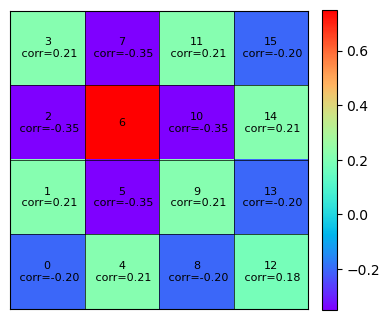

In [34]:
site = 6
grid_indices = np.array([[3,7,11,15],
                         [2,6,10,14],
                         [1,5,9,13],
                         [0,4,8,12]])

corr_site = np.array([ [correlations[site,i] for i in row] for row in grid_indices])
# print(grid_indices)

fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(corr_site, cmap='rainbow')#, vmin=-0.75, vmax=0.75)

center = site
for i in range(4):
    for j in range(4):
        site = grid_indices[i, j]
        val = corr_site[i, j]
        if site==center:
            ax.text(j, i, f"{site}", ha='center', va='center', fontsize=8)
        else:
            ax.text(j, i, f"{site}\n corr={val:.2f}", ha='center', va='center', fontsize=8)

# Griglia
ax.set_xticks(np.arange(-.5, 3, 1), minor=True)
ax.set_yticks(np.arange(-.5, 3, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

ax.set_xticks([])
ax.set_yticks([])

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

In [ ]:
# SAME AS THE PREVIOUS CELL BUT ONLY FOR NEAREST NEIGHBORS AND NEXT NEIREST NEIGHBORS OF ONE SITE

# site = 6
# L=16
# grid_indices = np.array([[(site-3)%L,(site+1)%L,(site+5)%L],
#                          [(site-4)%L,site,(site+4)%L],
#                          [(site-5)%L,(site-1)%L,(site+3)%L]])

# corr_site = np.array([ [correlations[site,i] for i in row] for row in grid_indices])
# print(grid_indices)

# fig, ax = plt.subplots(figsize=(3, 3))
# im = ax.imshow(corr_site, cmap='rainbow')#, vmin=-0.75, vmax=0.75)

# center = site
# # Etichette dei siti nel plot
# for i in range(3):
#     for j in range(3):
#         site = grid_indices[i, j]
#         val = corr_site[i, j]
#         ax.text(j, i, f"{site}", ha='center', va='center', fontsize=8)

# # Griglia
# ax.set_xticks(np.arange(-.5, 3, 1), minor=True)
# ax.set_yticks(np.arange(-.5, 3, 1), minor=True)
# ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
# ax.tick_params(which='minor', bottom=False, left=False)

# ax.set_xticks([])
# ax.set_yticks([])

# plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# plt.tight_layout()
# plt.show()

Correlations for each pair of J1 and J2

J1=0.0_J2=1.0/
nearest neighbor correlation -6.97045348245103e-32
next neighbor correlation -0.7499999999999988

J1=0.2_J2=0.98/
nearest neighbor correlation -4.968899256519069e-32
next neighbor correlation -0.7499999999999999

J1=0.38_J2=0.92/
nearest neighbor correlation -9.013352139732264e-32
next neighbor correlation -0.75

J1=0.56_J2=0.83/
nearest neighbor correlation -0.32275899963284693
next neighbor correlation 0.11050043220745881

J1=0.71_J2=0.71/
nearest neighbor correlation -0.3458779515410335
next neighbor correlation 0.18047875105604594

J1=0.83_J2=0.56/
nearest neighbor correlation -0.34927691273148237
next neighbor correlation 0.1964981233959616

J1=0.92_J2=0.38/
nearest neighbor correlation -0.35038177217235483
next neighbor correlation 0.2045661717279239

J1=0.98_J2=0.2/
nearest neighbor correlation -0.3507887236228805
next neighbor correlation 0.20980778658124938

J1=1.0_J2=0.0/
nearest neighbor correlation -0.35089010026340034
next neighbor correlation 0.213765285399

C:\Users\Costa\AppData\Local\Temp\ipykernel_28148\3908861339.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # lascia spazio per la colorbar


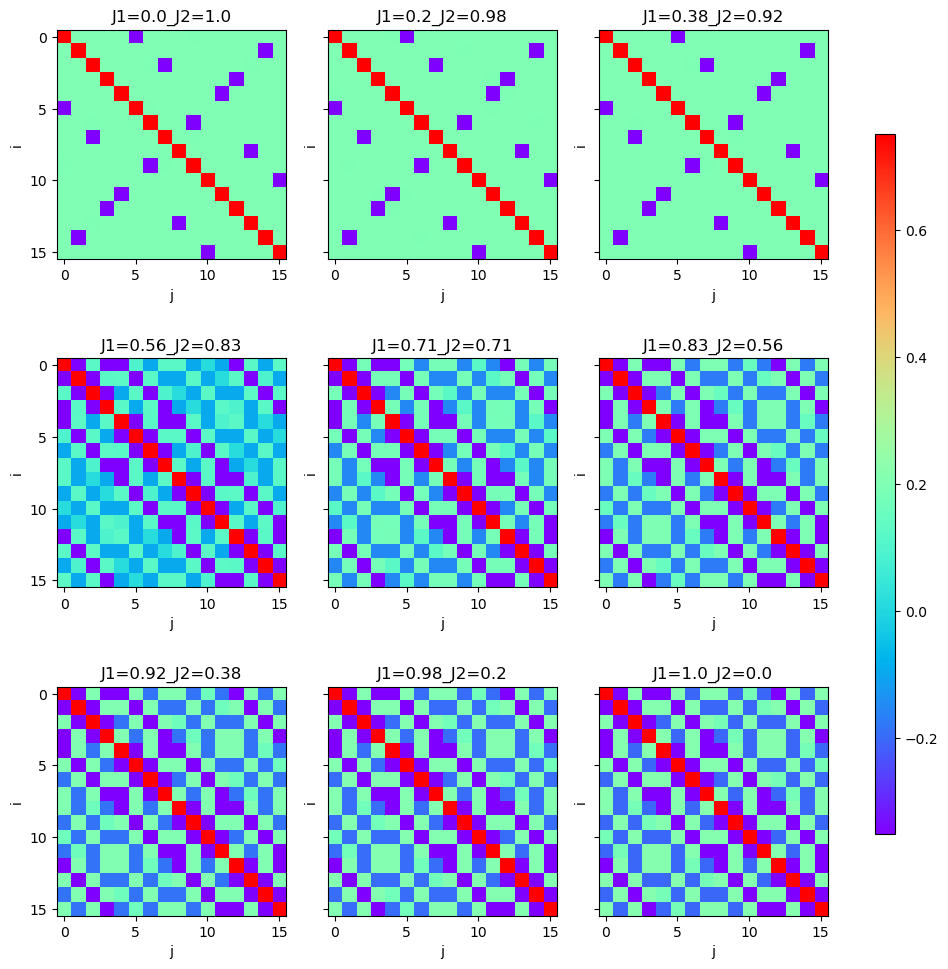

In [ ]:
folder = ["J1=0.0_J2=1.0/", "J1=0.2_J2=0.98/","J1=0.38_J2=0.92/",
          "J1=0.56_J2=0.83/", "J1=0.71_J2=0.71/", "J1=0.83_J2=0.56/", 
          "J1=0.92_J2=0.38/", "J1=0.98_J2=0.2/", "J1=1.0_J2=0.0/"]

fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharey=True)

for f, ax in enumerate(axes.flatten()):
    F = f
    N = 8
    print(folder[F])
    eigvecs = np.load(save_path + folder[F] + f"eigvals block N={N}/" + f"eigvecs_N={N}.npy")

    GS = eigvecs[:, 0]
    L = Lx * Ly
    correlations = HD.compute_sisj_correlations(GS, N, L)

    SzSz_nn_exval, SzSz_nnn_exval = HD.sisj_mean(GS, N, L, neighbors_indices, diag_indices)
    print("nearest neighbor correlation", SzSz_nn_exval)
    print("next neighbor correlation", SzSz_nnn_exval)
    print("")

    # Plot sul subplot specifico
    im = ax.imshow(correlations, cmap='rainbow')
    ax.set_title(folder[F][:-1]) 
    ax.set_xlabel('j')
    ax.set_ylabel('i')
    ax.set_yticks([0, 5, 10, 15])

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  
fig.colorbar(im, cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()


### Hopping triplets is 6th order phenomenon


In [39]:
F = 0 #which folder? ie which values of J1 and J2
print(folder[F])
N = 9 #which block? ie number of spin up
eigvals = np.load(save_path+folder[F]+f"eigvals block N={N}/"+f"eigvals_N={N}.npy")
eigvecs = np.load(save_path + folder[F] + f"eigvals block N={N}/" + f"eigvecs_N={N}.npy")
for i in range(8):
    print(i, eigvals[i])
psi1 = eigvecs[:,0] # mi fisso sul "primo" statp del sottospazio con Sz=1 (9 spin up)

SiSj_nn, _ =  HD.build_SiSj(Lx,Ly,N,neighbors_indices,diag_indices)


Vn1_1, Vn1_2, Vn1_3, Vn1_4, Vn1_5, Vn1_6, Vn1_7 = 0., 0., 0., 0., 0., 0., 0.
for i in range(1,8):
    psin = eigvecs[:,i]              # e poi valuto la sovrapposizione di psi1 con gli altri stati di questo sottospazio che hanno la stessa energia
    Vn1_1 += np.vdot(psin, SiSj_nn @ psi1)
    Vn1_2 += np.vdot(psin, SiSj_nn**2 @ psi1)
    Vn1_3 += np.vdot(psin, SiSj_nn**3 @ psi1)
    Vn1_4 += np.vdot(psin, SiSj_nn**4 @ psi1)
    Vn1_5 += np.vdot(psin, SiSj_nn**5 @ psi1)
    Vn1_6 += np.vdot(psin, SiSj_nn**6 @ psi1)
    # Vn1_7 += np.vdot(psin, SiSj_nn**7 @ psi1)

print(Vn1_1, Vn1_2, Vn1_3, Vn1_4, Vn1_5, Vn1_6)#, Vn1_7)

J1=0.0_J2=1.0/
0 -5.0000000000000115
1 -5.000000000000003
2 -5.000000000000002
3 -5.0
4 -4.999999999999999
5 -4.999999999999999
6 -4.999999999999996
7 -4.999999999999993
1.0022093831912882e-17 -7.953300561538978e-17 7.806255641895632e-16 3.3566899260151217e-16 1.082814393704723e-14 1.0995371280131394e-13


[1.0022093831912882e-17, -7.953300561538978e-17, 7.806255641895632e-16, 3.3566899260151217e-16, 1.082814393704723e-14, 1.0995371280131394e-13]


Text(0, 0.5, '$\\langle \\sum_{ij} S_i S_j \\rangle^n$')

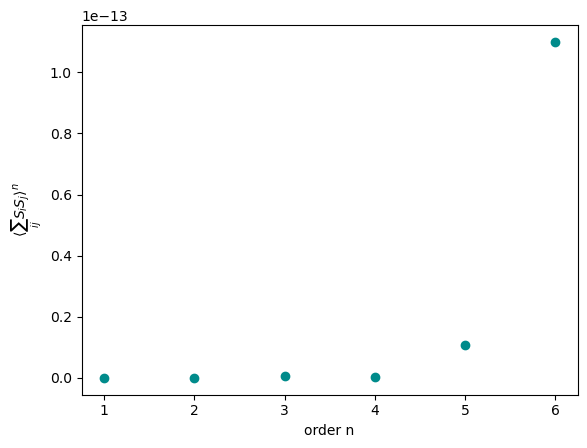

In [40]:
Vn1 = [Vn1_1, Vn1_2, Vn1_3, Vn1_4, Vn1_5, Vn1_6]#,Vn1_7]
print(Vn1)
order = [1,2,3,4,5,6]#,7]
plt.plot(order,np.abs(Vn1),color="darkcyan", marker='o',linestyle="")
plt.xlabel("order n")
plt.ylabel(r'$\langle \sum_{ij} S_i S_j \rangle^n$')